<a href="https://colab.research.google.com/github/Mrityunjaytiwari27/Crop-Yield-Prediction/blob/main/Crop_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Crop yeild Prediction Model
Name: Mrityunjay Tiwari
Roll no: 23126035

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Crop_yeld dataset/crop yield data sheet.xlsx")
data.shape

(109, 7)

In [ ]:
data.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [ ]:
data.tail()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,:,NaN,NaN,NaN,NaN


In [ ]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      99 non-null     object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.2+ KB


In [ ]:
data.columns

Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')

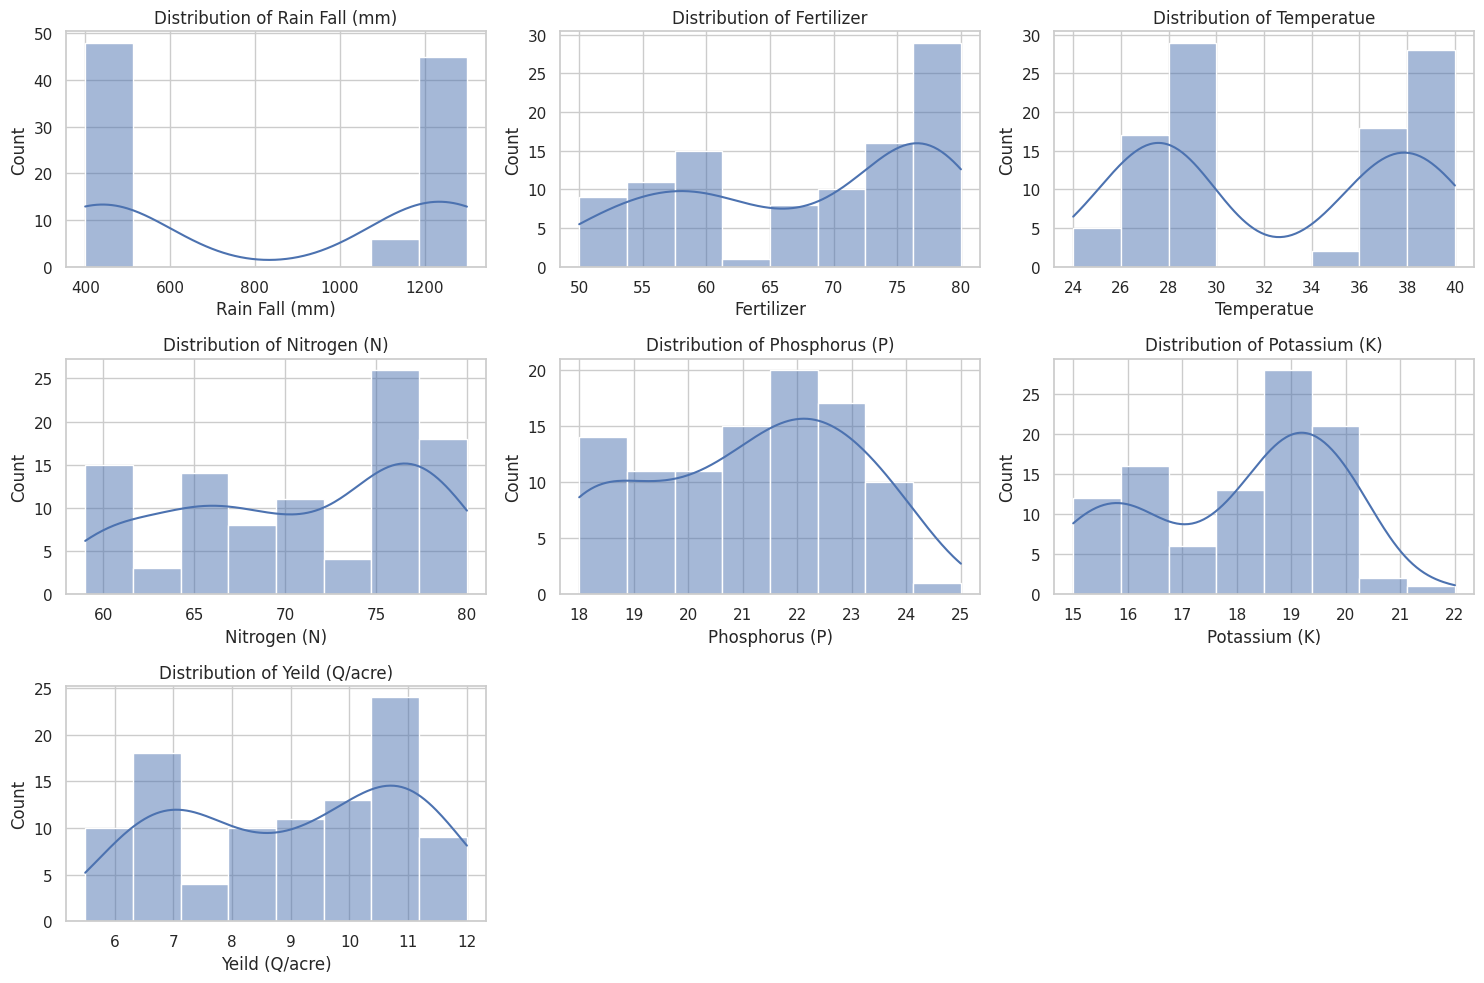

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

for i, column in enumerate(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(data[column],kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

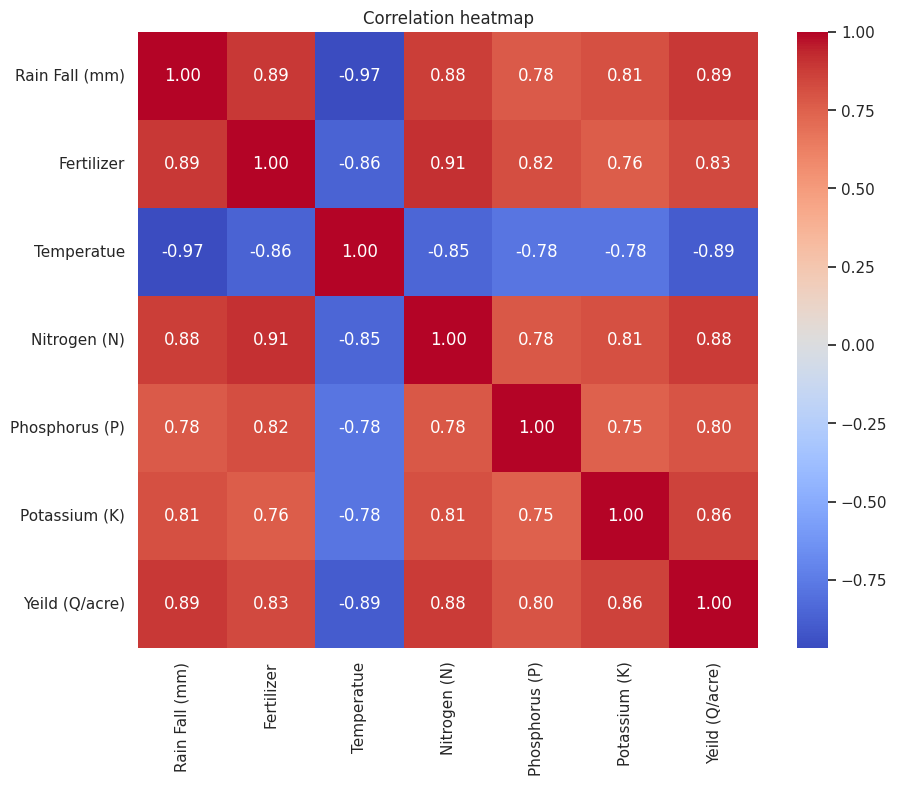

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

In [ ]:
data=data.drop(['Temperatue'],axis=1)
data.shape

(99, 6)

In [ ]:
X=data.drop(['Yeild (Q/acre)'],axis=1)
y=data['Yeild (Q/acre)']

In [ ]:
X.head()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K)
0,1230.0,80.0,80.0,24.0,20.0
1,480.0,60.0,70.0,20.0,18.0
2,1250.0,75.0,78.0,22.0,19.0
3,450.0,65.0,70.0,19.0,18.0
4,1200.0,80.0,79.0,22.0,19.0


In [ ]:
y.tail()

,Yeild (Q/acre)
94,9.0
95,6.5
96,10.5
97,7.0
98,12.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler()
}
for name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    # Train Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} — MSE: {mse:.4f}, R²: {r2:.4f}")

MinMaxScaler — MSE: 0.4709, R²: 0.8994
StandardScaler — MSE: 0.4709, R²: 0.8994
RobustScaler — MSE: 0.4709, R²: 0.8994


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:', mse)
rf_score = rf_regressor.score(X_test, y_test)
print("Random Forest R-squared score: ", rf_score)

Mean Squared Error: 0.4810299999999998
Random Forest R-squared score:  0.8972569750367108


In [ ]:
# Create a SVR object
svr_regressor = SVR(kernel='rbf')

# Train the model on the training data
svr_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = svr_regressor.predict(X_test)

# Calculate the R-squared score
mse = mean_squared_error(y_test, y_pred_svr)
svr_score = svr_regressor.score(X_test, y_test)
print('Mean Squared Error:', mse)
print("Support Vector Regression R-squared score: ", svr_score)

Mean Squared Error: 0.603800021708973
Support Vector Regression R-squared score:  0.8710345701863094


In [ ]:
# Create a Gradient Boosting Regressor object
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_regressor.predict(X_test)

# Calculate the R-squared score
gb_score = gb_regressor.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_gb)
print('Mean Squared Error:', mse)
print("Gradient Boosting Regression R-squared score: ", gb_score)

Mean Squared Error: 0.4256587860040149
Gradient Boosting Regression R-squared score:  0.909083692750444


In [ ]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso(alpha=0.03)  # You can tune alpha
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"R²: {r2_score(y_test, y_pred_lasso):.4f}")

# Ridge Regression
ridge = Ridge(alpha=0.1)  # You can tune alpha
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("\nRidge Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"R²: {r2_score(y_test, y_pred_ridge):.4f}")

Lasso Regression:
MSE: 0.5619
R²: 0.8800

Ridge Regression:
MSE: 0.4783
R²: 0.8978


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # retain 95% variance
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"{name} — MSE: {mse:.4f}, R²: {r2:.4f}")

RobustScaler — MSE: 0.7932, R²: 0.8306


In [ ]:
# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:', mse)
rf_score = rf_regressor.score(X_test, y_test)
print("Random Forest R-squared score: ", rf_score)

Mean Squared Error: 0.7028030555555556
Random Forest R-squared score:  0.849888547738768


In [ ]:
# Create a Gradient Boosting Regressor object
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_regressor.predict(X_test)

# Calculate the R-squared score
gb_score = gb_regressor.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_gb)
print('Mean Squared Error:', mse)
print("Gradient Boosting Regression R-squared score: ", gb_score)

Mean Squared Error: 0.9749727873226419
Gradient Boosting Regression R-squared score:  0.7917559124661291


In [ ]:
import pickle
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler',StandardScaler()), ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42))])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
y_pred=pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2_score = pipe.score(X_test, y_test)
print("R-squared score: ", r2_score)

Mean Squared Error: 0.4256587860040149
R-squared score:  0.909083692750444


In [ ]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
from google.colab import files
files.download('pipe.pkl')